# Data Cleaning with Pandas

In [1]:
import pandas as pd

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. We can do this at the command line:

```bash
wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
wget https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
```

*Note:* If you do not have the `wget` command yet, you can install it: `brew install wget`.

Note that `%20` in a URL translates into a space. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the tile that you want to unzip.


You can use tab completion (press the `tab` key after the first three letters) to fill in the names, including spaces. This will 

In [2]:
!cd data

In [3]:
sales_df = pd.read_csv('data/EXTR_RPSale.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [4]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [5]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.5+ MB


In [7]:
bldg_df = pd.read_csv('data/Residential Building.zip')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [8]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [9]:
bldg_df.head().T

,0,1,2,3,4
Major,4300,4610,4610,4610,4900
Minor,167,399,503,505,56
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,15223 40TH AVE S 98188,4431 FERNCROFT RD 98040,4516 FERNCROFT RD 98040,4538 FERNCROFT RD 98040,3015 SW 105TH ST 98146
BuildingNumber,15223,4431,4516,4538,3015
Fraction,,,,,
DirectionPrefix,,,,,SW
StreetName,40TH,FERNCROFT,FERNCROFT,FERNCROFT,105TH
StreetType,AVE,RD,RD,RD,ST


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [10]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [11]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511412 entries, 0 to 511411
Data columns (total 4 columns):
Major            511412 non-null int64
Minor            511412 non-null int64
SqFtTotLiving    511412 non-null int64
ZipCode          468372 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB


In [13]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

In [14]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'])

ValueError: Unable to parse string "      " at position 935519

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [15]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [16]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.5+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [18]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [19]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 61.5+ MB


Now, let's try our join again.

In [158]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [159]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [160]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437522 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1437522 non-null float64
Minor            1437522 non-null float64
DocumentDate     1437522 non-null object
SalePrice        1437522 non-null int64
SqFtTotLiving    1437522 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 76.8+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [161]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
99,858140.0,376.0,05/22/2012,0,900,NaN
100,858140.0,376.0,11/28/2017,0,900,NaN
152,720319.0,520.0,11/20/2013,699950,2840,NaN
153,720319.0,520.0,09/16/2013,0,2840,NaN
163,894677.0,240.0,12/21/2016,818161,2450,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

In [162]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [163]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322148 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1322148 non-null float64
Minor            1322148 non-null float64
DocumentDate     1322148 non-null object
SalePrice        1322148 non-null int64
SqFtTotLiving    1322148 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 70.6+ MB


# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

---
---
Before starting, let's create my own version of the data:


In [188]:
sales_data_wm = sales_data

In [189]:
sales_data_wm['SalePrice'].head()

0    245000
1    109300
2     14684
3         0
4         0
Name: SalePrice, dtype: int64

In [190]:
sales_data_wm.shape

(1322148, 6)

In [191]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322148 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1322148 non-null float64
Minor            1322148 non-null float64
DocumentDate     1322148 non-null object
SalePrice        1322148 non-null int64
SqFtTotLiving    1322148 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 70.6+ MB


...so there are values of `SalePrice` for every row. But we don't want `0` values because they are likely to be property transfers, not actual sales.
 
And don't want any really low values either, because they might be weird edge cases or data quality issues.

In [192]:
sales_data_wm.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,1.322148e+06,1.322148e+06,1.322148e+06,1.322148e+06
mean,4.477971e+05,1.588399e+03,2.826850e+05,2.088334e+03
std,2.862037e+05,2.872664e+03,7.451584e+05,9.663883e+02
min,4.000000e+01,1.000000e+00,-6.000000e+02,0.000000e+00
25%,2.021060e+05,1.160000e+02,0.000000e+00,1.430000e+03
50%,3.856900e+05,3.300000e+02,1.600000e+05,1.920000e+03
75%,7.227500e+05,1.040000e+03,3.450000e+05,2.540000e+03
max,9.906000e+05,9.689000e+03,3.000000e+07,4.816000e+04


So there is at least one negative sale price! And note that the 25th percentile is 0!

Let's investigate the distribution of `SalePrice` a bit. But first let's at least get rid of the <=0's now.

In [193]:
#Let's at least get rid of the zero sale prices now.
sales_data_wm = sales_data_wm.loc[sales_data_wm['SalePrice'] > 0]
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867413 entries, 0 to 1437520
Data columns (total 6 columns):
Major            867413 non-null float64
Minor            867413 non-null float64
DocumentDate     867413 non-null object
SalePrice        867413 non-null int64
SqFtTotLiving    867413 non-null int64
ZipCode          867413 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


Wow, that got rid of a lot of rows, down from 1.3M to 870K, not surprising because the 25th-ile was 0.

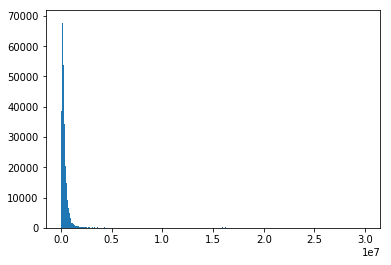

In [194]:
import matplotlib.pyplot as plt # Plotting
%matplotlib inline

fig, ax = plt.subplots()

#ax.hist(sales_data_2['SalePrice'])
ax.hist(sales_data_wm['SalePrice'], bins = 1000)
plt.show()

Wow, that's difficult to intrpret. LOL. Let's try transforming it.

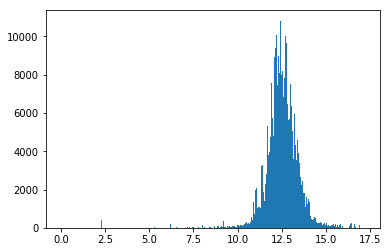

In [195]:
import math
fig, ax = plt.subplots()

ax.hist(sales_data_wm['SalePrice'].map(math.log), bins = 1000)
plt.show()

Just by visual inspection I would say most of the distribution fall between 9 and 16, assuming normality. Why not? haha. So reverse engineering that back to `SalePrice`:

In [196]:
print( 'estimated low :' + '${:,.2f}'.format(math.exp(9)))
print( 'estimated high:' + '${:,.2f}'.format(math.exp(16)))
#'${:,.2f}'.format(1234.5)

estimated low :$8,103.08
estimated high:$8,886,110.52


Let's use some something close to these #'s to filter down our dataset.  
Call it:
- greater than or equal to 10K
- lesser than or equal to 9M

In [197]:
sales_data_wm = sales_data_wm.loc[ (sales_data_wm['SalePrice'] >= 10000) &
                          (sales_data_wm['SalePrice']<=9000000) ]

In [198]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861028 entries, 0 to 1437520
Data columns (total 6 columns):
Major            861028 non-null float64
Minor            861028 non-null float64
DocumentDate     861028 non-null object
SalePrice        861028 non-null int64
SqFtTotLiving    861028 non-null int64
ZipCode          861028 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.0+ MB


Lost about 6K observations.

In [200]:
sales_data_wm.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,861028.000000,861028.000000,8.610280e+05,861028.000000
mean,452072.787161,1484.738020,4.010259e+05,2102.759035
std,286249.522976,2763.339929,5.308673e+05,947.310693
min,40.000000,1.000000,1.000000e+04,0.000000
25%,206110.000000,115.000000,1.650000e+05,1450.000000
50%,388580.000000,320.000000,2.764500e+05,1940.000000
75%,723730.000000,958.000000,4.500000e+05,2560.000000
max,990600.000000,9689.000000,9.000000e+06,48160.000000


So that cut down our dataset from 1.3M to about 860K. But also noticed that `SqFtTotLiving` also has a min of `0`. I think this is not in keeping with the process we are trying to indentify so will screen those out. Let's do a similar exercise.

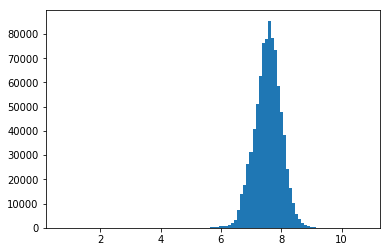

In [203]:
fig, ax = plt.subplots()

ax.hist(sales_data_wm['SqFtTotLiving'].loc[sales_data_wm['SqFtTotLiving']!=0].map(math.log),bins = 100)

plt.show()

Hmmm, let's go with 5.5 to 9

In [204]:
print( 'estimated low :' + '{:,.0f}'.format(math.exp(5.5)))
print( 'estimated high:' + '{:,.0f}'.format(math.exp(9)))
#'${:,.2f}'.format(1234.5)

estimated low :245
estimated high:8,103


I'll go with 200 and 8000

In [205]:
sales_data_wm = sales_data_wm.loc[ (sales_data_wm['SqFtTotLiving'] >= 200) & \
                                (sales_data_wm['SqFtTotLiving'] <= 8000)]

In [206]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860340 entries, 0 to 1437520
Data columns (total 6 columns):
Major            860340 non-null float64
Minor            860340 non-null float64
DocumentDate     860340 non-null object
SalePrice        860340 non-null int64
SqFtTotLiving    860340 non-null int64
ZipCode          860340 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 45.9+ MB


That removed about another 1K.

In [207]:
sales_data_2.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,860340.000000,860340.000000,8.603400e+05,860340.000000
mean,452146.100185,1483.179664,3.997408e+05,2097.259168
std,286259.948257,2761.359878,5.263066e+05,921.611910
min,40.000000,1.000000,1.000000e+04,200.000000
25%,206110.000000,115.000000,1.650000e+05,1450.000000
50%,388580.000000,320.000000,2.760000e+05,1940.000000
75%,723730.000000,955.000000,4.500000e+05,2560.000000
max,990600.000000,9689.000000,9.000000e+06,8000.000000


No nulls, Value's don't seem unreasonable, at least in my own layman's experience (with regards to real estate).

---
---

### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [209]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
        #x == int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head(5)


10168    98042-3001
10169    98042-3001
10170    98042-3001
10171    98042-3001
10172    98042-3001
Name: ZipCode, dtype: object

In [213]:
# let's look at my own version of the data so far.

sales_data_wm.loc[sales_data_wm['ZipCode'].apply(is_integer) == False, 'ZipCode'].head(5)

10168    98042-3001
10169    98042-3001
10170    98042-3001
10171    98042-3001
16528    98199-3014
Name: ZipCode, dtype: object

Truncate the zip at 5 characters

In [220]:
#sales_data = sales_data_2
sales_data_wm['ZipCode'] = sales_data_wm['ZipCode'].apply(lambda x : str(x)[:5])
sales_data_wm['ZipCode'].head()

0    98002
1    98002
2    98002
6    98092
7    98092
Name: ZipCode, dtype: object

In [221]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860340 entries, 0 to 1437520
Data columns (total 6 columns):
Major            860340 non-null float64
Minor            860340 non-null float64
DocumentDate     860340 non-null object
SalePrice        860340 non-null int64
SqFtTotLiving    860340 non-null int64
ZipCode          860340 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 45.9+ MB


In [218]:
sales_data['ZipCode'].tail(10)

1437512    98177
1437513    98155
1437514    98022
1437515    98008
1437516    98116
1437517    98059
1437518    98008
1437519    98077
1437520    98027
1437521    98155
Name: ZipCode, dtype: object

I'm curious about the distribution of these zips:

In [223]:
sales_data_wm['ZipCode'].value_counts().head(20)

98042    27929
98023    24310
98115    23422
98038    23197
98052    21767
98034    21468
98006    20922
98058    20514
98103    19816
98117    19802
98118    19150
98074    18187
98133    17445
98033    17325
98001    16906
98155    16626
98059    16601
98031    16279
98092    15791
98056    15529
Name: ZipCode, dtype: int64

In [225]:
sales_data_wm['ZipCode'].value_counts().tail(20)

9859.    2
98       2
9804     2
98079    2
95125    2
98132    2
98063    2
28028    1
98176    1
98054    1
98044    1
90855    1
98013    1
99019    1
98101    1
B        1
8126     1
95055    1
0        1
95059    1
Name: ZipCode, dtype: int64

Notice that there's weird zips with letters or other characters, and some with only partial numeric chars.

In [226]:
#How do I "extract" zip code (US) from the following string?

I've used reg-ex before, so think that might be best way to clean up the rest of the zips. I want remaining zips where all 5 characters are numbers.


In [227]:
# Create a zip-code helper function
import re

def is_zip(might_be_zip_str):
    """Returns True if a zip code, else False"""
    
    # https://stackoverflow.com/questions/2577236/regex-for-zip-code
    # I don't write regex, I merely SO->copy/paste it. haha
    zip_match = re.match('[0-9]{5}(?:-[0-9]{4})?$', might_be_zip_str)
    if zip_match:
        return True
    else:
        return False

Start testing!

In [229]:
# 99999 True
print(is_zip('99999'))

#99-99 False
print(is_zip('99-99'))

#A - False
print(is_zip('A'))

#99999-9999 True
print(is_zip('99999-9999'))

True
False
False
True


In [230]:
sales_data_wm = sales_data_wm.loc[ sales_data_wm['ZipCode'].apply(is_zip), : ]
sales_data_wm.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092


In [231]:
sales_data_wm['ZipCode'].value_counts()

98042    27929
98023    24310
98115    23422
98038    23197
98052    21767
98034    21468
98006    20922
98058    20514
98103    19816
98117    19802
98118    19150
98074    18187
98133    17445
98033    17325
98001    16906
98155    16626
98059    16601
98031    16279
98092    15791
98056    15529
98125    14795
98003    14221
98168    14140
98075    13364
98198    12778
98030    12701
98178    12412
98053    12298
98027    12138
98106    12116
         ...  
98121        5
98083        4
98097        4
98035        4
98043        3
98189        3
98157        3
90055        3
98017        3
90108        3
98021        2
98025        2
98026        2
98302        2
98111        2
98204        2
98079        2
95125        2
98132        2
98063        2
98176        1
28028        1
95055        1
98044        1
90855        1
98101        1
98054        1
99019        1
98013        1
95059        1
Name: ZipCode, Length: 115, dtype: int64

In [232]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860319 entries, 0 to 1437520
Data columns (total 6 columns):
Major            860319 non-null float64
Minor            860319 non-null float64
DocumentDate     860319 non-null object
SalePrice        860319 non-null int64
SqFtTotLiving    860319 non-null int64
ZipCode          860319 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 45.9+ MB


Doesn't look like it was many, but it got rid of them!

---
---

### 3. Add a column for PricePerSqFt

In [261]:
sales_data_wm['PricePerSqFt'] = sales_data_wm['SalePrice'] / sales_data_wm['SqFtTotLiving']
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 605 to 1437220
Data columns (total 8 columns):
Major              3599 non-null float64
Minor              3599 non-null float64
DocumentDate       3599 non-null object
SalePrice          3599 non-null int64
SqFtTotLiving      3599 non-null int64
ZipCode            3599 non-null object
PricePerSqFt       3599 non-null float64
DocumentDateUse    3599 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 253.1+ KB


In [275]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt
0,138860.0,110.0,08/21/2014,245000,1490,98002,164.429530
1,138860.0,110.0,06/12/1989,109300,1490,98002,73.355705
2,138860.0,110.0,01/16/2005,14684,1490,98002,9.855034
6,423943.0,50.0,07/15/1999,96000,960,98092,100.000000
7,423943.0,50.0,01/08/2001,127500,960,98092,132.812500


In [234]:
sales_data_wm.tail(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt
1437510,11410.0,629.0,01/26/1998,171000,730,98028,234.246575
1437511,568000.0,570.0,01/09/2013,400000,2120,98108,188.679245
1437512,944230.0,10.0,10/01/2001,280000,2530,98177,110.671937
1437513,797990.0,510.0,09/27/1985,62000,1730,98155,35.838150
1437514,42007.0,9047.0,03/09/1988,86000,1990,98022,43.216080
1437515,386510.0,80.0,09/22/2003,559950,2780,98008,201.420863
1437516,782870.0,70.0,09/09/1985,78000,1400,98116,55.714286
1437517,947794.0,320.0,02/22/2002,331681,3010,98059,110.193023
1437519,721470.0,820.0,04/15/2005,484950,2620,98077,185.095420
1437520,235430.0,782.0,06/01/1984,85000,1500,98027,56.666667


I'm curious as to whether the price per sq ft smells right. Maybe try to plot the distribution.

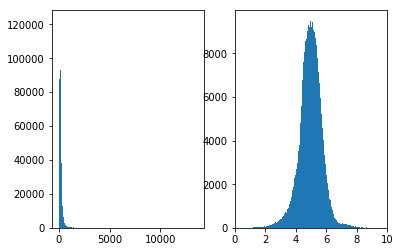

In [248]:
fig, ax = plt.subplots(1,2)

ax[0].hist(sales_data_wm['PricePerSqFt'], bins = 500)
ax[1].hist(sales_data_wm['PricePerSqFt'].map(math.log), bins = 500)

plt.show()

In [260]:
sales_data_wm['PricePerSqFt'].describe()

count     3599.000000
mean       404.288978
std        431.226063
min          3.333333
25%        238.525375
50%        340.909091
75%        470.948987
max      13255.813953
Name: PricePerSqFt, dtype: float64

Seems ok for now. Also keep in mind we are not inflation adjusting these values.

### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

Create a column with properly formatted date.

In [251]:
sales_data_wm.columns

Index(['Major', 'Minor', 'DocumentDate', 'SalePrice', 'SqFtTotLiving',
       'ZipCode', 'PricePerSqFt'],
      dtype='object')

In [252]:
#Look at the dates.
sales_data_wm['DocumentDate'].value_counts()

06/10/2004    298
06/24/2004    278
05/24/2004    275
07/25/2001    275
06/28/2004    267
06/20/2005    264
05/25/2004    259
06/23/2004    255
04/27/2004    254
06/21/2004    254
10/07/2002    251
07/25/2005    251
08/26/2003    250
08/25/1999    248
06/23/2003    246
06/18/2003    244
05/25/1999    243
06/24/1998    243
04/26/2004    242
05/26/2004    240
04/26/1994    240
12/14/2001    239
05/27/2004    239
06/25/2004    238
12/12/2001    237
06/23/1998    237
05/24/2005    237
08/25/2004    235
06/22/2004    235
07/22/2002    235
             ... 
12/23/2018      1
08/19/1984      1
09/04/2010      1
07/11/1999      1
06/21/1987      1
03/21/1993      1
11/26/2015      1
09/30/1989      1
04/18/1987      1
07/04/1990      1
01/17/1993      1
09/21/1985      1
12/16/1995      1
12/12/2009      1
11/08/2008      1
12/04/1994      1
01/01/2010      1
04/22/1984      1
01/16/1972      1
05/25/2008      1
02/07/1980      1
02/25/1989      1
04/04/2010      1
12/08/1981      1
12/31/1995

Seems Ok? Let's try converting to date.

In [253]:
sales_data_wm['DocumentDateUse'] = pd.to_datetime(sales_data_wm['DocumentDate'])

In [254]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860319 entries, 0 to 1437520
Data columns (total 8 columns):
Major              860319 non-null float64
Minor              860319 non-null float64
DocumentDate       860319 non-null object
SalePrice          860319 non-null int64
SqFtTotLiving      860319 non-null int64
ZipCode            860319 non-null object
PricePerSqFt       860319 non-null float64
DocumentDateUse    860319 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 59.1+ MB


In [255]:
# OK, now subset by year = 2019
sales_data_wm = sales_data_wm[ sales_data_wm['DocumentDateUse'].dt.year == 2019 ]

In [256]:
sales_data_wm.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse
605,214090.0,110.0,03/06/2019,390000,1780,98042,219.101124,2019-03-06
651,367890.0,30.0,03/13/2019,923000,2550,98144,361.960784,2019-03-13
868,350160.0,125.0,02/06/2019,935000,2460,98117,380.081301,2019-02-06
1063,882790.0,870.0,02/15/2019,890000,2380,98105,373.949580,2019-02-15
1341,30200.0,645.0,03/04/2019,380000,1750,98001,217.142857,2019-03-04


In [257]:
sales_data_wm.tail(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse
1432030,277660.0,116.0,03/18/2019,740000,1510,98117,490.066225,2019-03-18
1432844,357480.0,970.0,02/22/2019,595000,2300,98034,258.695652,2019-02-22
1433315,92304.0,9521.0,01/17/2019,562500,2450,98168,229.591837,2019-01-17
1433918,887900.0,39.0,01/14/2019,301000,1270,98032,237.007874,2019-01-14
1434391,100.0,67.0,03/18/2019,358308,2240,98002,159.958929,2019-03-18
1434593,138730.0,80.0,01/18/2019,510000,1390,98011,366.906475,2019-01-18
1435029,712930.0,4285.0,02/08/2019,475000,2360,98118,201.271186,2019-02-08
1435864,541410.0,122.0,02/14/2019,485000,1050,98118,461.904762,2019-02-14
1435989,162040.0,180.0,02/07/2019,1099000,2660,98034,413.157895,2019-02-07
1437220,637300.0,167.0,01/25/2019,695000,1780,98116,390.449438,2019-01-25


Seems to have converted OK. Let's double check that our dataset has shrunk signficantly.

In [262]:
sales_data_wm.shape

(3599, 8)

Yes! Only 3.6K rows :)   

---
---

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

---
---
Alex found a list of zip codes! will use below.

In [270]:
seattle_zips = pd.read_csv('Zip_Codes.csv')
#seattle_zips.head()
seattle_zips['ZIP'] = seattle_zips['ZIP'].apply(str)

In [271]:
seattle_zips = pd.DataFrame(seattle_zips['ZIP'].unique(),columns=['zip'])

In [272]:
seattle_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
zip    196 non-null object
dtypes: object(1)
memory usage: 1.6+ KB


Visually comparing to the other sources, it seems that that this is way more zips than would expect? For example, the list Anna Slacked was ~30ish. I think *this* list might be all potential Seattle Zips, as in present and future?

For simplicity I will just use the Anna's list =D.  Although, theoretically, it shouldn't matter? If the *extra* zips on first list were invalid, then they shouldn't join on actual data anyway.

In [274]:
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, \
                98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, \
                98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]

# confirmed with Anna that this was her source:
# http://www.city-data.com/zipmaps/Seattle-Washington.html

#Convert to df, because I want to use merge. Because.
seattle_zips = pd.DataFrame(seattle_zips,columns=['zip'])
seattle_zips['zip'] = seattle_zips['zip'].apply(str)
seattle_zips.head()

,zip
0,98101
1,98102
2,98103
3,98104
4,98105


In [268]:
seattle_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
zip    31 non-null object
dtypes: object(1)
memory usage: 328.0+ bytes


Join it up!

In [277]:
sales_data_wm = pd.merge( sales_data_wm, seattle_zips
                             ,how = 'inner'
                             ,left_on = 'ZipCode'
                             ,right_on = 'zip')

In [278]:
sales_data_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1213
Data columns (total 9 columns):
Major              1214 non-null float64
Minor              1214 non-null float64
DocumentDate       1214 non-null object
SalePrice          1214 non-null int64
SqFtTotLiving      1214 non-null int64
ZipCode            1214 non-null object
PricePerSqFt       1214 non-null float64
DocumentDateUse    1214 non-null datetime64[ns]
zip                1214 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 94.8+ KB


In [279]:
sales_data_wm.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse,zip
0,367890.0,30.0,03/13/2019,923000,2550,98144,361.960784,2019-03-13,98144
1,327480.0,560.0,01/18/2019,108560,890,98144,121.977528,2019-01-18,98144
2,149830.0,2872.0,03/12/2019,615000,1190,98144,516.806723,2019-03-12,98144
3,128230.0,1465.0,02/06/2019,415000,2300,98144,180.434783,2019-02-06,98144
4,56700.0,295.0,03/19/2019,587250,1200,98144,489.375000,2019-03-19,98144


### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!

In [286]:
mean_price_sqft = sales_data_wm['SalePrice'].sum() / sales_data_wm['SqFtTotLiving'].sum()
'${:.2f}'.format(mean_price_sqft)

'$468.59'

In [287]:
'${:.2f}'.format(sales_data_wm['PricePerSqFt'].mean()) #Because I'm curious

'$508.34'